# TSNE for most similar words to a particular word

In [1]:
import gensim
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

C:\Anaconda\envs\py35\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
model = gensim.models.KeyedVectors.load_word2vec_format('entire_corpora.model.bin', binary=True)

In [3]:
# Test the loaded word2vec model in gensim
# We will need the raw vector for a word
print(model['lalaki']) 

# We will also need to get the words closest to a word
model.similar_by_word('lalaki')

[ -1.67358863e+00  -8.80612135e-01   5.41092634e-01   1.20109689e+00
  -2.20373559e+00   6.71512365e-01   4.43080872e-01  -1.06913574e-01
  -8.33102018e-02   2.86612302e-01  -4.01043966e-02  -1.24336071e-01
   6.95230722e-01   1.44124699e+00  -6.31112099e-01  -1.40149975e+00
  -4.75195438e-01   1.10687459e+00  -4.35555279e-01   7.27732360e-01
  -8.52141678e-01   7.15678275e-01   1.22082152e-03   9.59170401e-01
  -4.07753944e-01   3.14028054e-01   5.77370882e-01   2.14406639e-01
  -2.23224330e+00   1.28002569e-01  -4.76913065e-01  -1.09903095e-02
   2.86308587e-01  -5.35637558e-01   1.02701509e+00  -4.34639037e-01
   3.69540542e-01  -1.49048305e+00   8.94164741e-01   2.36060366e-01
   1.93224147e-01   7.69233167e-01  -5.08256614e-01   9.95430872e-02
   5.02855003e-01   3.35779607e-01   4.95705456e-01  -8.72654259e-01
  -2.00565314e+00  -1.05020583e+00  -8.50123167e-01  -4.11744213e+00
   1.30898011e+00   5.31696081e-01  -3.33303452e-01   1.40875757e+00
   7.37603486e-01  -5.16288996e-01

[('babae', 0.8909374475479126),
 ('lalake', 0.8208658695220947),
 ('lalaking', 0.6969627737998962),
 ('babaeng', 0.6462954878807068),
 ('babai', 0.6403608322143555),
 ('babaing', 0.6258118748664856),
 ('dalaga', 0.6104586720466614),
 ('batang', 0.5957152843475342),
 ('binatilyo', 0.5850462913513184),
 ('matanda', 0.5628199577331543)]

In [3]:
def display_closestwords_tsnescatterplot(model, word, n):
    
    arr = np.empty((0,200), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word, topn=n)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00001, x_coords.max()+0.00001)
    plt.ylim(y_coords.min()+0.00001, y_coords.max()+0.00001)
    plt.show()

<IPython.core.display.Javascript object>


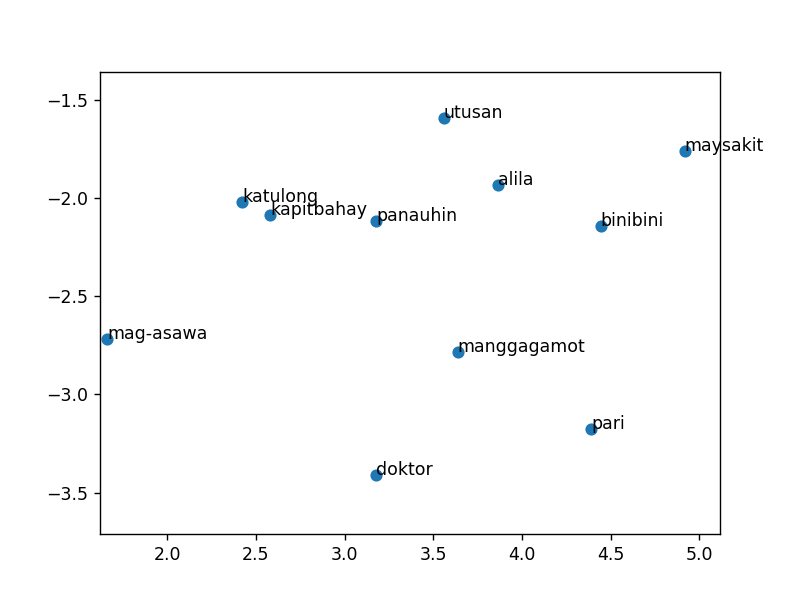

In [4]:
display_closestwords_tsnescatterplot(model, 'lalaki', 100)